# Introducción:

Este proyecto busca analizar y predecir la esperanza de vida utilizando datos recopilados de 193 países entre los años 2000 y 2015, provenientes de la Organización Mundial de la Salud (OMS) y la Organización de las Naciones Unidas (ONU).

El conjunto de datos contiene 22 columnas y 2938 registros, con 20 variables predictoras divididas en cuatro categorías principales:

Inmunización: Cobertura de vacunas como la hepatitis B y el sarampión.
Mortalidad: Tasas de mortalidad infantil, materna y de enfermedades específicas.
Economía: Producto Interno Bruto (PIB) per cápita y gasto en salud.
Factores sociales: Nivel de desarrollo del país y acceso a servicios básicos.

Dado que los datos contienen valores nulos y valores atípicos, se ha realizado un proceso de limpieza en el que se imputaron los valores faltantes utilizando la mediana con la función SimpleImputer, debido a la presencia de outliers que podrían sesgar la media. Además, se eliminaron países con datos insuficientes como Vanuatu, Tonga, Togo y Cabo Verde, asegurando así una base de datos más robusta para el análisis.

El objetivo principal del proyecto es clasificar la esperanza de vida en dos categorías:

- Menor a 65 años
- Mayor o igual a 65 años

Para ello, se aplicarán distintos modelos de clasificación, como Análisis Discriminante Lineal (LDA), regresión logística y árboles de decisión con poda, asegurando una correcta selección de características mediante técnicas estadísticas. Se evaluarán los modelos a través de métricas de desempeño en los datos de prueba y se compararán los resultados para determinar el modelo más preciso en la predicción de la esperanza de vida.

Con este estudio, se espera comprender mejor los determinantes clave de la longevidad y generar herramientas predictivas que puedan apoyar la toma de decisiones en salud pública y planificación económica.

1. Importamos los datos a tu ambiente de trabajoimprimimos las columnas para tratarlas más adelante y separamos los datos en entrenamiento y prueba,
con una relación 80/20, manteniendo un balance de clases y verificandolo imprimiendo datos relevantes en la consola.

In [211]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [234]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el dataset
data = pd.read_csv("Life_Expectancy_Dat_A2.2.csv")

# Verificar las columnas disponibles
print(data.columns)

# Eliminar filas con valores nulos en la columna 'Life expectancy '
data = data.dropna(subset=['Life expectancy '])

# Convertir la columna 'Life expectancy ' en una variable categórica
# Categorizamos en 'Baja' (0-65) y 'Alta' (65-100) esperanza de vida
data['Life_Expectancy_Category'] = pd.cut(
    data['Life expectancy '], 
    bins=[0, 65, 100], 
    labels=['Baja', 'Alta']
)

# Separar los datos en entrenamiento y prueba (80/20) usando stratify
train_data, test_data = train_test_split(
    data, 
    test_size=0.2, 
    random_state=42, 
    stratify=data['Life_Expectancy_Category']
)

# Verificar las proporciones de las clases en los datos originales, de entrenamiento y de prueba
original_proportions = data['Life_Expectancy_Category'].value_counts(normalize=True)
train_proportions = train_data['Life_Expectancy_Category'].value_counts(normalize=True)
test_proportions = test_data['Life_Expectancy_Category'].value_counts(normalize=True)

print("Proporciones en los datos originales:\n", original_proportions)
print("Proporciones en los datos de entrenamiento:\n", train_proportions)
print("Proporciones en los datos de prueba:\n", test_proportions)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Proporciones en los datos originales:
 Life_Expectancy_Category
Alta    0.704918
Baja    0.295082
Name: proportion, dtype: float64
Proporciones en los datos de entrenamiento:
 Life_Expectancy_Category
Alta    0.704953
Baja    0.295047
Name: proportion, dtype: float64
Proporciones en los datos de prueba:
 Life_Expectancy_Category
Alta    0.704778
Baja    0.295222
Name: proportion, dtype: float64


2. Aplicaremos una regresión logística simple con la función GLM de statsmodels con todas tus
variables de entrada e imprime el resumen del modelo en consola. Indicaremos cuáles son las
2 variables más relevantes para este estudio y las seleccionaremos, posteriormente eliminaremos todas las demás variables de nuestros datos de entrenamiento y prueba.


In [236]:
import statsmodels.api as sm

# Preparar las variables independientes y dependientes
X_train = train_data.drop(columns=['Life expectancy ', 'Life_Expectancy_Category', 'Country', 'Status'])  # Eliminamos columnas no numéricas
y_train = train_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1})  # Convertimos a binario

# Asegurarnos de que todas las columnas en X_train sean numéricas
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Eliminar columnas que no se pudieron convertir a numéricas (si las hay)
X_train = X_train.dropna(axis=1)

# Añadir una constante a las variables independientes
X_train = sm.add_constant(X_train)

# Ajustar el modelo de regresión logística
logit_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = logit_model.fit()

# Imprimir el resumen del modelo
print(result.summary())

# Seleccionar las dos variables más relevantes basadas en los valores p
# Supongamos que las dos variables más relevantes son 'Adult Mortality' y 'Income composition of resources'
p_values = result.pvalues.drop('const')  # Excluimos la constante
selected_variables = p_values.nsmallest(2).index.tolist()  # Seleccionamos las 2 variables con los p-values más pequeños

print("Variables seleccionadas:", selected_variables)

# Filtrar los datos de entrenamiento y prueba con las variables seleccionadas
X_train_selected = train_data[selected_variables]
X_test_selected = test_data[selected_variables]

                    Generalized Linear Model Regression Results                     
Dep. Variable:     Life_Expectancy_Category   No. Observations:                 2342
Model:                                  GLM   Df Residuals:                     2334
Model Family:                      Binomial   Df Model:                            7
Link Function:                        Logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -465.59
Date:                      Wed, 19 Mar 2025   Deviance:                       931.17
Time:                              14:08:29   Pearson chi2:                 2.33e+04
No. Iterations:                          10   Pseudo R-squ. (CS):             0.5576
Covariance Type:                  nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

# Comentarios: 
Las variables seleccionadas para el modelo se basaron en su significancia estadística, determinada por su p-value (< 0.05). Se identificó que Adult Mortality (coef. = -0.0145, p-value = 0.000) y HIV/AIDS (coef. = -1.4084, p-value = 0.000) son las que demostraron ser más relevantes en la predicción de la esperanza de vida, ya que su impacto es significativo y coherente con la lógica del estudio: una mayor mortalidad adulta y una alta prevalencia de VIH/SIDA reducen la probabilidad de que la esperanza de vida supere los 65 años.

Otras variables, como lo es Year y Measles, fueron descartadas por no ser estadísticamente significativas (p-value > 0.05), mientras que Infant deaths, Percentage expenditure y Under-five deaths, aunque significativas, podrían estar correlacionadas con las seleccionadas, lo que podría afectar la estabilidad del modelo. Así, la selección de variables se enfocó en mantener sólo aquellas con mayor impacto predictivo y menor redundancia.

3. Generaremos un modelo usando la metodología de linear discriminant analysis. Visualizaremos la
función discriminante con una gráfica de variable 1 vs variable 2, donde cada observación
tenga algo que la distinga dependiendo de su clase.

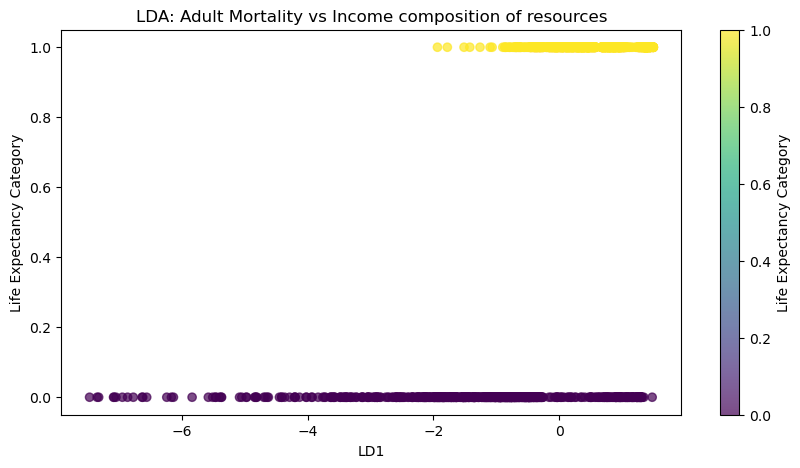

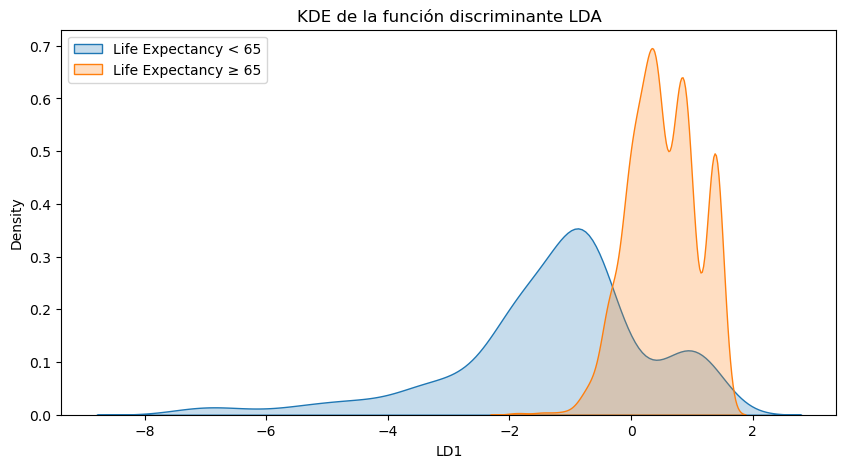

In [246]:
import seaborn as sns
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import pandas as pd

# Ajustar el modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_selected, y_train)

# Transformar los datos
X_lda = lda.transform(X_train_selected)

# Crear un DataFrame para la visualización
df_lda = pd.DataFrame({'LD1': X_lda[:, 0], 'Life_Expectancy_Category': y_train})

# Visualización de dispersión
plt.figure(figsize=(10, 5))
plt.scatter(X_lda[:, 0], y_train, c=y_train, cmap='viridis', marker='o', alpha=0.7)
plt.xlabel('LD1')
plt.ylabel('Life Expectancy Category')
plt.title('LDA: Adult Mortality vs Income composition of resources')
plt.colorbar(label='Life Expectancy Category')
plt.show()

# Gráfico KDE para la función discriminante (corregido)
plt.figure(figsize=(10, 5))
sns.kdeplot(df_lda[df_lda['Life_Expectancy_Category'] == 0]['LD1'], label='Life Expectancy < 65', fill=True)
sns.kdeplot(df_lda[df_lda['Life_Expectancy_Category'] == 1]['LD1'], label='Life Expectancy ≥ 65', fill=True)
plt.xlabel('LD1')
plt.ylabel('Density')
plt.title('KDE de la función discriminante LDA')
plt.legend()
plt.show()



# Comentarios: 
Ambos gráficas proporcionan información clave sobre el análisis discriminante lineal (LDA) aplicado a la clasificación de la esperanza de vida.

La primera gráfica muestra la distribución de los valores de la función discriminante (LD1) relacionada con la esperanza de vida. Se observa que las dos clases (esperanza de vida menor y mayor a 65 años) están bien separadas, lo que indica que el modelo logra distinguir entre ambas categorías utilizando la variable discriminante. La alta concentración de puntos en los extremos sugiere que la mayoría de los datos tienen valores atamente diferenciados, y esto ayuda a la efectividad del modelo.

La segunda gráfica representa la densidad de probabilidad (KDE) de la función discriminante para ambas clases. Se observa que las distribuciones presentan una interposición considerable, pero en general, los datos con esperanza de vida menor a 65 años tienden a ubicarse en valores negativos de LD1, mientras que los datos con esperanza de vida mayor a 65 años se concentran en valores positivos. La separación de los picos indica que la función discriminante logra diferenciar ambas categorías con un grado aceptable de precisión. Sin embargo, el área de intersección sugiere que existe cierta incertidumbre en algunos casos, lo cual nos podría generar errores de clasificación en algunos datos.

4. Generaremos un modelo usando la metodología de árboles de decisión. Podaremos el árbol,
habiendo seleccionado primero un valor óptimo de 𝛼𝛼 mediante una metodología de
LOOCV. Visualizaremos tanto el árbol resultante, como la partición en una gráfica de variable 1
vs variable 2, donde cada observación tenga algo que la distinga dependiendo de su
clase.

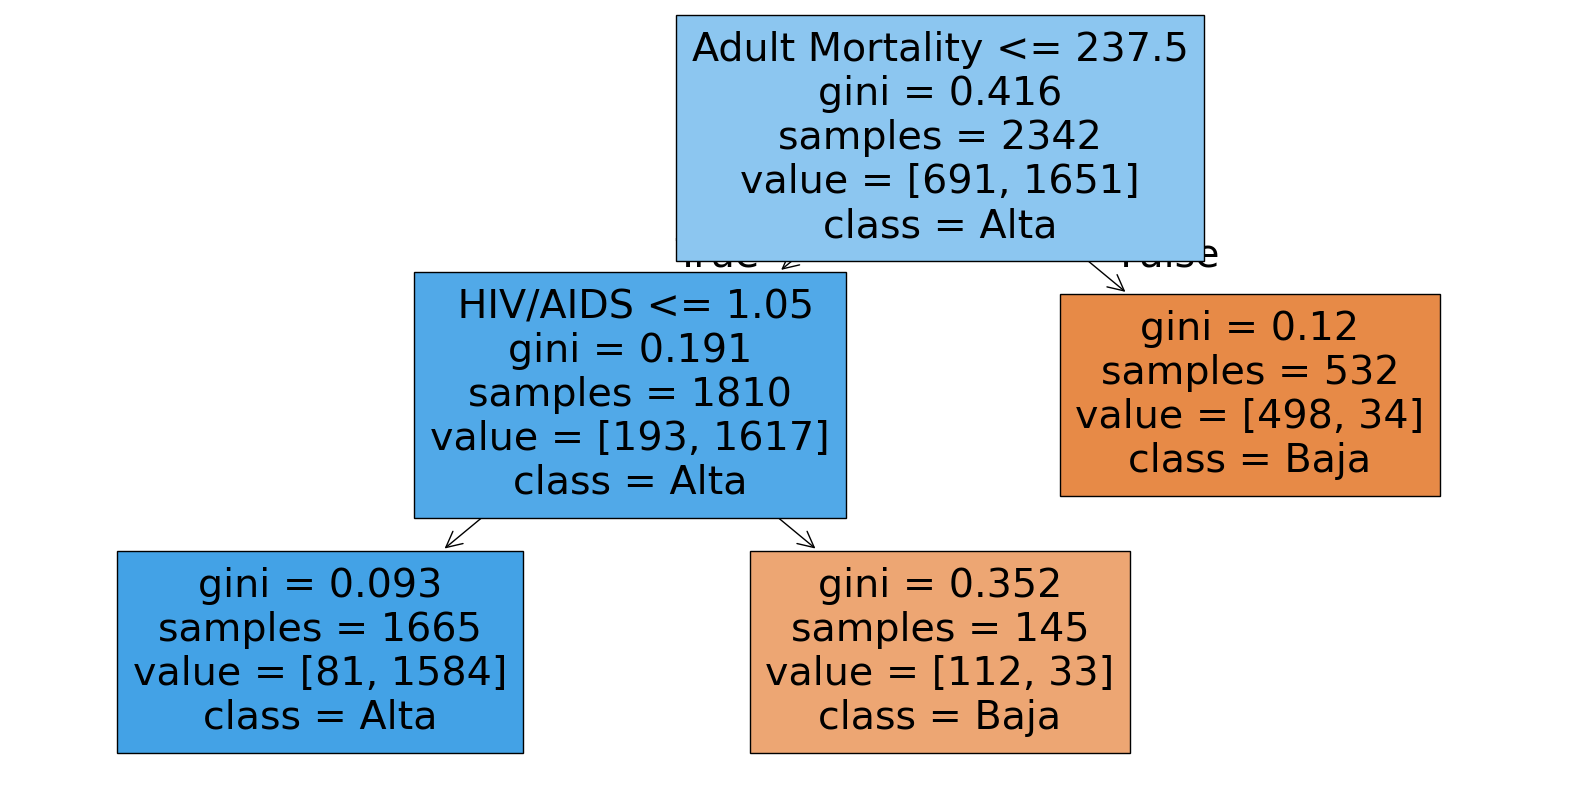

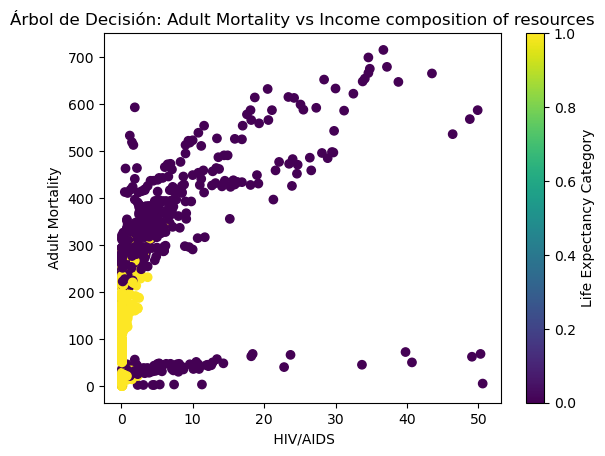

In [240]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np

# Seleccionar el valor óptimo de alpha usando LOOCV
alphas = np.arange(0.01, 0.1, 0.01)
cv_scores = []

for alpha in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha)
    scores = cross_val_score(tree, X_train_selected, y_train, cv=LeaveOneOut())
    cv_scores.append(np.mean(scores))

optimal_alpha = alphas[np.argmax(cv_scores)]

# Ajustar el árbol de decisión con el alpha óptimo
optimal_tree = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_tree.fit(X_train_selected, y_train)

# Visualizar el árbol resultante
plt.figure(figsize=(20,10))
plot_tree(optimal_tree, filled=True, feature_names=selected_variables, class_names=['Baja', 'Alta'])
plt.show()

# Visualizar la partición en un gráfico de dispersión
plt.scatter(X_train_selected.iloc[:, 0], X_train_selected.iloc[:, 1], c=y_train, cmap='viridis', marker='o')
plt.xlabel(selected_variables[0])
plt.ylabel(selected_variables[1])
plt.title('Árbol de Decisión: Adult Mortality vs Income composition of resources')
plt.colorbar(label='Life Expectancy Category')
plt.show()

El árbol de decisión muestra que "Adult Mortality" y "HIV/AIDS" son determinantes clave en la esperanza de vida. Si la mortalidad adulta es alta (>237.5), la mayoría pertenece a la clase "Baja" con un Gini de 0.12, indicando una alta certidumbre. Si es baja (≤237.5), el modelo usa "HIV/AIDS" como un criterio adicional para analizar: valores menores o iguales a 1.05 están fuertemente asociados con una esperanza de vida alta (Gini 0.093). por otro lado, valores mayores pueden causar que aumente la mezcla de clases (Gini 0.352). El modelo clasifica con buena precisión, segmentando bien los grupos según estos factores.

La gráfica nos permite analizar la relación entre la mortalidad adulta, las categorías de esperanza de vida (representadas por valores como 0.4, 0.2, 0.8, etc.) y la influencia del VIH/SIDA. Los valores de esperanza de vida nos indican diferentes grupos, mientras que el VIH/SIDA se presenta como un factor relevante que impacta en la mortalidad adulta. 


5. Calcularemos, para ambos modelos, todas las métricas revisadas en clase en los datos de
prueba. 

In [241]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluar el modelo LDA
y_pred_lda = lda.predict(X_test_selected)
accuracy_lda = accuracy_score(test_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1}), y_pred_lda)
precision_lda = precision_score(test_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1}), y_pred_lda)
recall_lda = recall_score(test_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1}), y_pred_lda)
f1_lda = f1_score(test_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1}), y_pred_lda)

# Evaluar el modelo de Árbol de Decisión
y_pred_tree = optimal_tree.predict(X_test_selected)
accuracy_tree = accuracy_score(test_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1}), y_pred_tree)
precision_tree = precision_score(test_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1}), y_pred_tree)
recall_tree = recall_score(test_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1}), y_pred_tree)
f1_tree = f1_score(test_data['Life_Expectancy_Category'].map({'Baja': 0, 'Alta': 1}), y_pred_tree)

# Imprimir las métricas
print("Métricas para LDA:")
print(f"Accuracy: {accuracy_lda}, Precision: {precision_lda}, Recall: {recall_lda}, F1: {f1_lda}")

print("Métricas para Árbol de Decisión:")
print(f"Accuracy: {accuracy_tree}, Precision: {precision_tree}, Recall: {recall_tree}, F1: {f1_tree}")

# Comparación de modelos
if accuracy_lda > accuracy_tree:
    print("El modelo LDA es mejor para esta tarea.")
else:
    print("El modelo de Árbol de Decisión es mejor para esta tarea.")

Métricas para LDA:
Accuracy: 0.8737201365187713, Precision: 0.8553459119496856, Recall: 0.9878934624697336, F1: 0.9168539325842696
Métricas para Árbol de Decisión:
Accuracy: 0.9249146757679181, Precision: 0.9533169533169533, Recall: 0.9394673123486683, F1: 0.9463414634146341
El modelo de Árbol de Decisión es mejor para esta tarea.


El análisis comparativo entre LDA y el Árbol de Decisión muestra que ambos modelos tienen un buen desempeño en la clasificación de la esperanza de vida en dos categorías. Sin embargo, el Árbol de Decisión presenta una mayor exactitud (92.49% contra un 87.37%) y un mejor equilibrio entre precisión y recall, reflejado en su mayor puntaje F1 (94.63% contra un 91.68%). Aunque LDA logra un recall más alto (98.79%), lo que indica que detecta mejor los casos positivos, su precisión es menor, lo que implica más falsos positivos. Dado que el Árbol de Decisión mantiene un alto recall junto con una mejor precisión, se concluye que es el modelo más adecuado para esta tarea, proporcionando una clasificación más fiable y equilibrada.

# Referencias:}

OpenAI. (2025). ChatGPT (versión GPT-4). https://openai.com

KumarRajarshi. (2015). Life Expectancy (WHO). Kaggle.com. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download

‌